In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
# bartlets spericity test
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [255]:
df = pd.read_csv('.\Spotify_Youtube.csv')
df.dropna(inplace=True)
df = df.drop_duplicates()
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [256]:
df.isnull().any()

Unnamed: 0          False
Artist              False
Url_spotify         False
Track               False
Album               False
Album_type          False
Uri                 False
Danceability        False
Energy              False
Key                 False
Loudness            False
Speechiness         False
Acousticness        False
Instrumentalness    False
Liveness            False
Valence             False
Tempo               False
Duration_ms         False
Url_youtube         False
Title               False
Channel             False
Views               False
Likes               False
Comments            False
Description         False
Licensed            False
official_video      False
Stream              False
dtype: bool

C:\Users\jaswa\AppData\Local\Temp\ipykernel_12216\4080070174.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


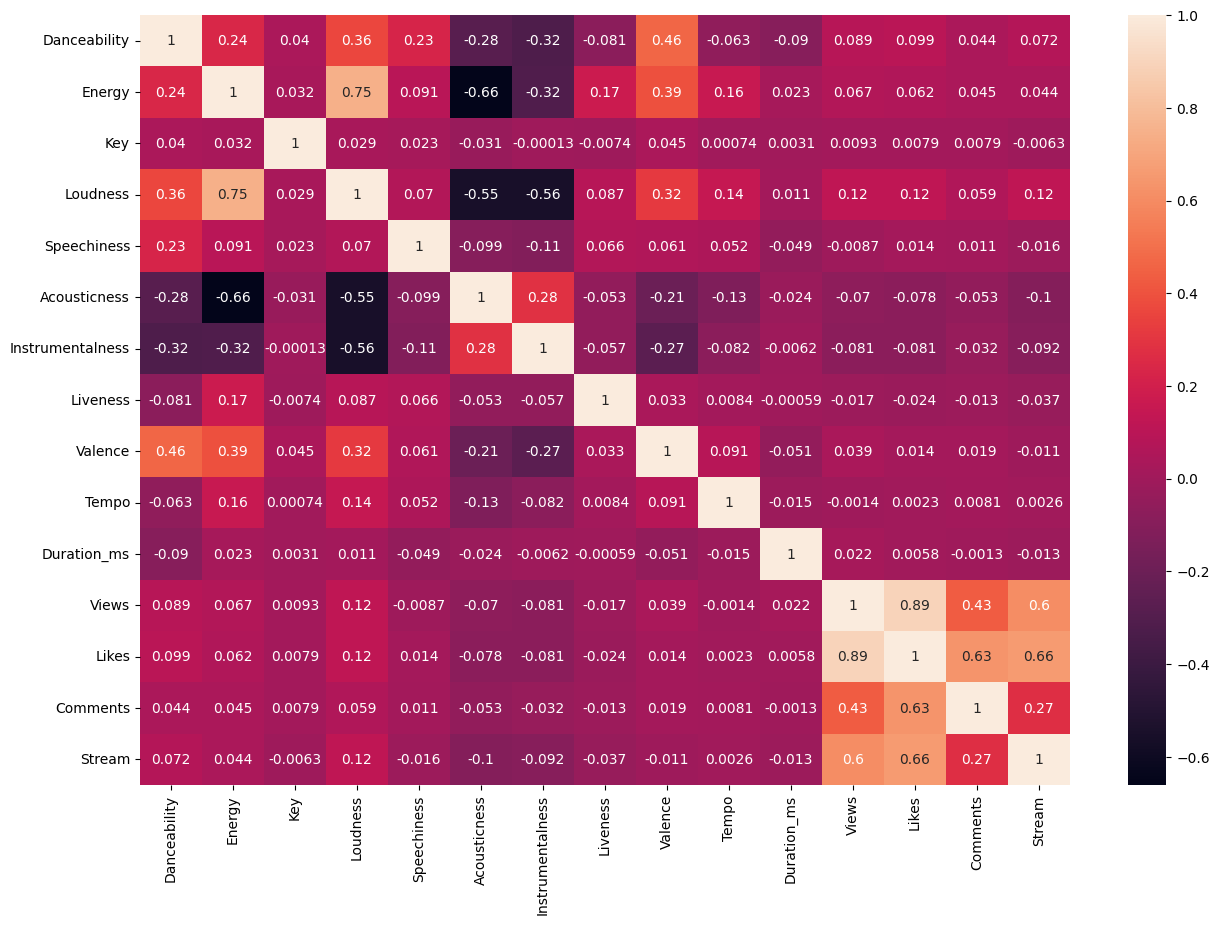

In [257]:
float_cols = df.select_dtypes(include=['float'])
float_cols.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(float_cols.corr(),annot=True)
fig.show()

In [258]:
# df_clean.head()

In [259]:
weights_df = float_cols.iloc[:,:11].copy()
weights_df.head(10)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0
5,0.760,0.891,11.0,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264,245000.0
6,0.716,0.897,4.0,-7.185,0.0629,0.012000,0.262000,0.3250,0.358,127.030,274142.0
7,0.726,0.815,11.0,-5.886,0.0313,0.007990,0.081000,0.1120,0.462,140.158,209560.0
8,0.741,0.913,2.0,-3.340,0.0465,0.003430,0.103000,0.3250,0.643,120.012,213750.0
9,0.625,0.877,10.0,-7.176,0.1620,0.031500,0.081100,0.6720,0.865,192.296,230426.0


In [260]:
targets_df = float_cols.iloc[:,11:].copy()
targets_df.head(10)

,Views,Likes,Comments,Stream
0,693555221.0,6220896.0,169907.0,1.040235e+09
1,72011645.0,1079128.0,31003.0,3.100837e+08
2,8435055.0,282142.0,7399.0,6.306347e+07
3,211754952.0,1788577.0,55229.0,4.346636e+08
4,618480958.0,6197318.0,155930.0,6.172597e+08
5,259021161.0,1844658.0,72008.0,3.238503e+08
6,451996.0,11686.0,241.0,1.066615e+07
7,1010982.0,17675.0,260.0,1.596059e+08
8,24459820.0,739527.0,20296.0,4.267190e+07
9,154761056.0,1386920.0,39240.0,1.910747e+08


MODEL

In [261]:
chi_square_value, p_value = calculate_bartlett_sphericity(weights_df)
# Print the test results
print('Bartlett Sphericity Test:')
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)

Bartlett Sphericity Test:
Chi-square value: 49920.096814442055
P-value: 0.0


In [262]:
object = StandardScaler()
cov_mat = np.cov(object.fit_transform(weights_df), rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)

[3.11731059 0.1616128  0.37324069 0.48639503 1.25163737 0.77022524
 0.84728136 1.05024905 0.94273849 0.9984491  1.00143412]


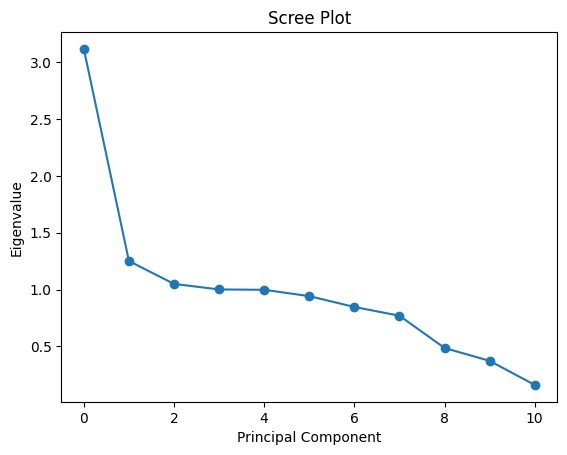

In [263]:
plt.plot(np.arange(0,11), sorted(eig_vals, reverse=True), marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [264]:
pca = PCA(n_components=7)
data_pca = pca.fit_transform(object.fit_transform(weights_df))
data_pca

array([[-1.82693002,  0.13332819, -1.83425628, ...,  0.81064274,
        -0.14766171,  1.20439514],
       [-1.04298798, -0.85480888,  1.32284501, ..., -0.05397448,
        -0.86027202, -0.09860511],
       [-1.38878571,  0.32942964,  0.64876238, ...,  0.4393001 ,
        -0.29476833, -0.76267965],
       ...,
       [-0.85138347,  1.55736088, -0.46368172, ..., -1.52179281,
        -0.18057303, -0.62588258],
       [-0.7812246 , -0.30308531, -2.12015916, ..., -1.51645133,
         1.48834155, -0.98353503],
       [ 0.87401979,  2.12436357, -0.71280295, ..., -1.77944292,
        -0.0923579 , -2.18732323]])

In [265]:
import statsmodels.api as sm
#!

#2

#3 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#DW Test
from statsmodels.stats.stattools import durbin_watson

In [266]:
for i in range(4):
    print(f'VIF of column {i}: {variance_inflation_factor(data_pca,i):.2f}')

VIF of column 0: 1.00
VIF of column 1: 1.00
VIF of column 2: 1.00
VIF of column 3: 1.00


In [267]:
dw_test = durbin_watson(data_pca, axis=0)

print('DW statistic for each column:', dw_test)

DW statistic for each column: [0.70290395 1.27355931 1.48847853 1.89931772 1.79918812 1.53774549
 1.37849014]


In [270]:
data_pca.shape

(19170, 7)

In [271]:
new_arr = data_pca[:, [3, 4]]
print("Modified array:\n", new_arr)

Modified array:
 [[ 0.67459271  0.81064274]
 [ 0.45776376 -0.05397448]
 [-1.20553758  0.4393001 ]
 ...
 [-0.77585652 -1.52179281]
 [ 0.96100139 -1.51645133]
 [ 0.43413048 -1.77944292]]


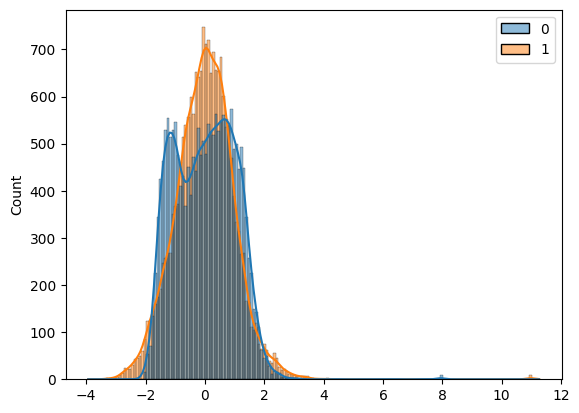

In [273]:
sns.histplot(new_arr, kde=True)
plt.show()

In [274]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [ ]:
# df_num_columns= df.select_dtypes(include=[np.number])
# df_num_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(data_pca,targets_df, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print('R^2 score:', score*100)

R^2 score: 1.2492475793788955


In [292]:
model = sm.OLS(targets_df.iloc[:,0], sm.add_constant(data_pca)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     40.73
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.55e-57
Time:                        19:27:59   Log-Likelihood:            -3.9992e+05
No. Observations:               19170   AIC:                         7.999e+05
Df Residuals:                   19162   BIC:                         7.999e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.72e+07   2.01e+06     48.410      0.0

In [301]:
glm_model = sm.GLM(targets_df.iloc[:,0], sm.add_constant(data_pca), family=sm.families.Poisson())

# Get the fitted results and print a summary
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Views   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19162
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5440e+12
Date:                Mon, 10 Apr 2023   Deviance:                   5.0881e+12
Time:                        19:29:47   Pearson chi2:                 1.40e+13
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2968   8.17e-07   2.24e+07      0.0

In [ ]:
glm_model = sm.GLM(targets_df.iloc[:,0], sm.add_constant(data_pca), family=sm.families.Poisson())

# Get the fitted results and print a summary
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Views   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19162
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5440e+12
Date:                Mon, 10 Apr 2023   Deviance:                   5.0881e+12
Time:                        19:29:47   Pearson chi2:                 1.40e+13
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2968   8.17e-07   2.24e+07      0.0

In [290]:
glm_model = sm.GLM(targets_df.iloc[:,1], sm.add_constant(data_pca), family=sm.families.Poisson())

# Get the fitted results and print a summary
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Likes   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19162
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6538e+10
Date:                Mon, 10 Apr 2023   Deviance:                   3.3076e+10
Time:                        19:27:32   Pearson chi2:                 8.61e+10
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3484   9.64e-06   1.38e+06      0.0

In [ ]:
glm_model = sm.GLM(targets_df.iloc[:,2], sm.add_constant(data_pca), family=sm.families.Poisson())

# Get the fitted results and print a summary
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Comments   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19168
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1351e+09
Date:                Mon, 10 Apr 2023   Deviance:                   2.2699e+09
Time:                        19:03:20   Pearson chi2:                 2.64e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2784
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2537   4.29e-05   2.39e+05      0.0

In [ ]:
glm_model = sm.GLM(targets_df.iloc[:,3], sm.add_constant(data_pca), family=sm.families.Poisson())

# Get the fitted results and print a summary
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Stream   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19168
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3543e+12
Date:                Mon, 10 Apr 2023   Deviance:                   4.7085e+12
Time:                        19:03:20   Pearson chi2:                 8.49e+12
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7432   6.15e-07   3.05e+07      0.0